<a href="https://colab.research.google.com/github/namans-git/iit_intern/blob/main/kolmogorov_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What is the Kolmogorov-Smirnov test?

The Kolmogorov-Smirnov Goodness of Fit Test (K-S test) ***compares your data with a known distribution and lets you know if they have the same distribution***. Although the test is **nonparametric** — it doesn’t assume any particular underlying distribution — it is commonly used as a test for **normality** to see if your data is normally distributed.
It’s also used to check the assumption of normality in Analysis of Variance.

More specifically, the test compares a known hypothetical probability distribution (e.g. the **normal distribution**) to the distribution generated by your data — the **empirical distribution function**.

The hypotheses for the test are:

* **Null hypothesis** ($H_0$): the data comes from the specified distribution.
* **Alternate Hypothesis** ($H_1$): at least one value does not match the specified distribution.

That is,
$H_0: P = P_0, H_1: P \neq P_0$. Where P is the distribution of your sample (i.e. the EDF) and $P_0$ is a specified distribution.

Calculating the test statistic:

---
The K-S test statistic measures the largest distance between the EDF $F_{data}(x)$ and the theoretical function $F_{0}(x)$, measured in a vertical direction. The test statistic is given by:

$D = \underset{x}{sup}|F_0(x)-F_{data}(x)|$

where (for a **two-tailed** test):

* $F_0(x)$ = the cdf of the hypothesized distribution,
* $F_{data}(x)$ = the empirical distribution function of your observed data.

For a **one-tailed test**, we omit the absolute values from the formula.

If **D is greater than the critical value**, the **null hypothesis is rejected**. Critical values for D are found in the K-S Test P-Value Table.

In [ ]:
from scipy.stats import kstest
import numpy as np

x = np.random.normal(0,1,1000)

(array([  4.,  13.,  55., 132., 225., 266., 189.,  82.,  30.,   4.]),
 array([-3.58731775, -2.91198091, -2.23664407, -1.56130723, -0.88597039,
        -0.21063356,  0.46470328,  1.14004012,  1.81537696,  2.4907138 ,
         3.16605064]),
 <a list of 10 Patch objects>)

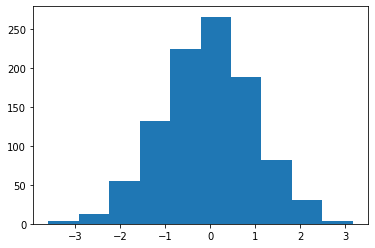

In [ ]:
import matplotlib.pyplot as plt
plt.hist(x)

In [ ]:
import scipy.stats as st
#sorting the data
data_sorted = np.sort(x)
#get cdf based on norm distribution
CDF = [st.norm.cdf(m) for m in data_sorted]

In [ ]:
#Find out the ECDF values
%matplotlib inline
ECDF = np.arange(len(x))/len(x)

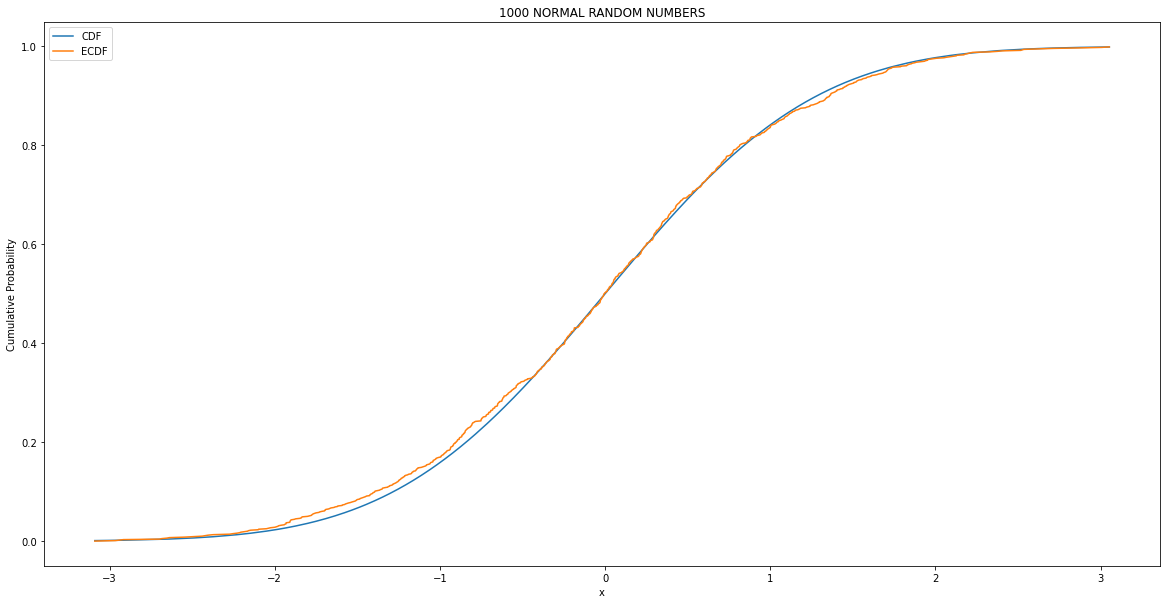

In [ ]:
#Plotting the CDF and ECDF values on a curve
fig = plt.figure(figsize= (20, 10))
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.title('1000 NORMAL RANDOM NUMBERS')

plt.plot(data_sorted, CDF)
plt.plot(data_sorted, ECDF)

plt.legend(['CDF', 'ECDF'])

In [ ]:
# one-sample KS test compares x to a cumulative distributive function (given as a callable function)
test_stat = kstest(x, 'norm')
print(test_stat)
# a p-value of 0.38 indicates that we can't reject the null hypothesis, which is that the data comes from the specified/tested distribution.

KstestResult(statistic=0.02852657204003972, pvalue=0.382702798626008)


In [ ]:
# two-sample KS test compares x to another sample (here from the same distribution)
from scipy.stats import ks_2samp

x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)
z = np.random.normal(1.1, 0.9, 1000)

In [ ]:
print(ks_2samp(x, y))
print(ks_2samp(x, z))

KstestResult(statistic=0.734, pvalue=8.696354510115212e-262)
KstestResult(statistic=0.476, pvalue=7.173678985416219e-103)


**Interpretation**

1. we can either compare **the statistic value**  to the KS-test critical value table according to our sample size. When statistic value is higher than the critical value, the two distributions are different.

2. or we can compare the **p-value to a level of significance $\alpha$**, usually $\alpha$=0.05 or 0.01 (lesser the $\alpha$, more significant is the result). If p-value is lower than $\alpha$, then it is very probable that the two distributions are different.